# Data Reshaping + Tidy Data

In [1]:
import pandas as pd
import numpy as np
import env

DB_URL = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/tidy_data'

## Data Reshaping

- **long** data has many rows and few columns
- **wide** data has many columns
- a **melt** takes the data from wide to long
- a **spread**, or **pivot** takes the data from long to wide
- a **transpose** rotates the dataframe 90 degrees

### Melt Example

In [12]:
np.random.seed(123)

# simple data for demonstration
df = pd.DataFrame({
    'a': np.random.randint(1, 11, 3),
    'b': np.random.randint(1, 11, 3),
    'c': np.random.randint(1, 11, 3),
    'x': np.random.randint(1, 11, 3),
    'y': np.random.randint(1, 11, 3),
    'z': np.random.randint(1, 11, 3),    
})
print(df.shape)
df

(3, 6)


,a,b,c,x,y,z
0,3,2,7,2,1,5
1,3,4,2,10,10,1
2,7,10,1,1,4,1


Different ways of using `.melt`:

In [13]:
df.melt(id_vars=['a', 'b', 'c'])

,a,b,c,variable,value
0,3,2,7,x,2
1,3,4,2,x,10
2,7,10,1,x,1
3,3,2,7,y,1
4,3,4,2,y,10
5,7,10,1,y,4
6,3,2,7,z,5
7,3,4,2,z,1
8,7,10,1,z,1


### Pivot Table Example

In [14]:
import itertools as it

df = pd.DataFrame(it.product('ABC', ['one', 'two', 'three']), columns=['group', 'subgroup'])
df['x'] = np.random.randn(df.shape[0])
df

,group,subgroup,x
0,A,one,-0.769433
1,A,two,0.576746
2,A,three,0.126526
3,B,one,-1.301489
4,B,two,2.207427
5,B,three,0.522742
6,C,one,0.465645
7,C,two,0.724915
8,C,three,1.495827


In [15]:
df.pivot_table(values='x', index='subgroup', columns='group')

group,A,B,C
subgroup,,,
one,-0.769433,-1.301489,0.465645
three,0.126526,0.522742,1.495827
two,0.576746,2.207427,0.724915


## Tidy Data

Tidy Data Characteristics:

- data is tabular, i.e. made up of rows and columns
- there is one value per cell
- each variable is a column
- each observation is a row

General Ideas

- Each variable is a characteristic of an observation
- If the units are the same, maybe they should be in the same column
- If one column has measurements of different units, it should be spread out
- Should you be able to groupby some of the columns? combine them
- Can I pass this data to seaborn?
- Can we ask interesting questions and answer them with a group by? I.e. generally we **don't** want to be taking row or column averages.

For the rest of this lesson, we'll look at data that is **not** tidy.

### One Column with Multiple Variables

In [24]:
df = pd.DataFrame({
    'name': ['Sally', 'Jane', 'Billy', 'Suzy'],
    'pet': ['dog: max', 'dog: buddy', 'cat: grizabella', 'hamster: fred']
})
df['pet_species'] = df.pet.str.split(': ').str[0]
df['pet_name'] = df.pet.str.split(': ').str[1]
df = df.drop(columns='pet')
df

,name,pet_species,pet_name
0,Sally,dog,max
1,Jane,dog,buddy
2,Billy,cat,grizabella
3,Suzy,hamster,fred


### One Variable in Multiple Columns

In [25]:
np.random.seed(123)

df = pd.DataFrame(
    np.random.uniform(60, 100, (4, 4)),
    columns=['Sally', 'Jane', 'Billy', 'Suzy'],
    index = pd.Index(['spelling', 'math', 'reading', 'nuclear physics'], name='subject')
).round(1).reset_index()
df

,subject,Sally,Jane,Billy,Suzy
0,spelling,87.9,71.4,69.1,82.1
1,math,88.8,76.9,99.2,87.4
2,reading,79.2,75.7,73.7,89.2
3,nuclear physics,77.5,62.4,75.9,89.5


In [31]:
df.transpose()

,0,1,2,3
subject,spelling,math,reading,nuclear physics
Sally,87.9,88.8,79.2,77.5
Jane,71.4,76.9,75.7,62.4
Billy,69.1,99.2,73.7,75.9
Suzy,82.1,87.4,89.2,89.5


What's an observation?

* a student
* class type (subject)
* a grade

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df

,subject,Sally,Jane,Billy,Suzy
0,spelling,87.9,71.4,69.1,82.1
1,math,88.8,76.9,99.2,87.4
2,reading,79.2,75.7,73.7,89.2
3,nuclear physics,77.5,62.4,75.9,89.5


In [43]:
tidy_df = df.melt(id_vars='subject', var_name='student', value_name='grade')
tidy_df.head(10)

,subject,student,grade
0,spelling,Sally,87.9
1,math,Sally,88.8
2,reading,Sally,79.2
3,nuclear physics,Sally,77.5
4,spelling,Jane,71.4
5,math,Jane,76.9
6,reading,Jane,75.7
7,nuclear physics,Jane,62.4
8,spelling,Billy,69.1
9,math,Billy,99.2


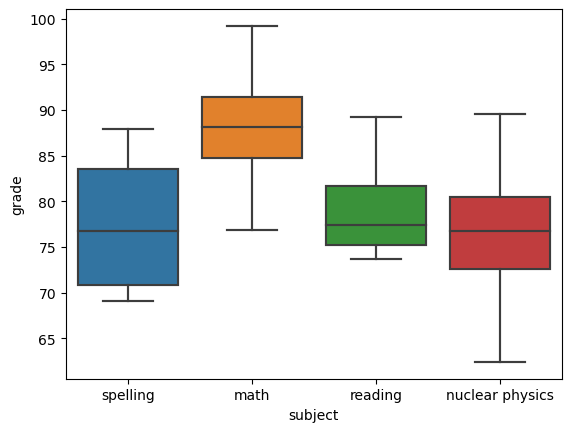

In [42]:
sns.boxplot(data=tidy_df, y='grade', x='subject')
plt.show()

- what is the average spelling grade?
- What is Jane's average grade?

Sometimes it is desirable to "untidy" the data for quick analysis / visualization. E.g. spread subject out to columns, students as rows.

### Multiple vars in 2 columns

- "incorrect melt"

In [44]:
df = pd.read_sql('SELECT * FROM gapminder1', DB_URL)
df.head()

,year,country,measure,measurement
0,1955,Afghanistan,pop,8891209.0
1,1960,Afghanistan,pop,9829450.0
2,1965,Afghanistan,pop,10997885.0
3,1970,Afghanistan,pop,12430623.0
4,1975,Afghanistan,pop,14132019.0


In [46]:
df.measure.value_counts()

pop            693
life_expect    693
fertility      693
Name: measure, dtype: int64

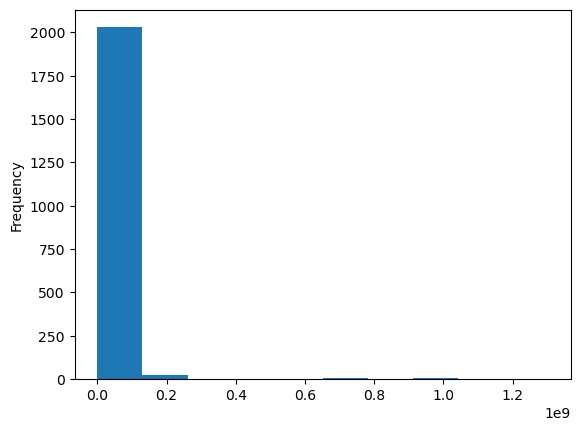

In [48]:
df.measurement.plot.hist()
plt.show()

In [49]:
df

,year,country,measure,measurement
0,1955,Afghanistan,pop,8.891209e+06
1,1960,Afghanistan,pop,9.829450e+06
2,1965,Afghanistan,pop,1.099788e+07
3,1970,Afghanistan,pop,1.243062e+07
4,1975,Afghanistan,pop,1.413202e+07
...,...,...,...,...
2074,1985,Venezuela,fertility,3.648500e+00
2075,1990,Venezuela,fertility,3.250000e+00
2076,1995,Venezuela,fertility,2.941500e+00
2077,2000,Venezuela,fertility,2.723000e+00


In [63]:
tidy_df = df.pivot_table(values='measurement', index=['year', 'country'], columns='measure')
tidy_df = tidy_df.reset_index()
tidy_df.columns.name = ''
tidy_df

,year,country,fertility,life_expect,pop
0,1955,Afghanistan,7.7000,30.332,8891209.0
1,1955,Argentina,3.1265,64.399,18927821.0
2,1955,Aruba,5.1500,64.381,53865.0
3,1955,Australia,3.4060,70.330,9277087.0
4,1955,Austria,2.5200,67.480,6946885.0
...,...,...,...,...,...
688,2005,Switzerland,1.4200,81.701,7489370.0
689,2005,Turkey,2.1430,71.777,69660559.0
690,2005,United Kingdom,1.8150,79.425,60441457.0
691,2005,United States,2.0540,78.242,295734134.0


### Another gnarly example

In [68]:
df = pd.read_sql('SELECT * FROM gapminder2', DB_URL)
df.head()

,country,life_expect_1955,life_expect_1960,life_expect_1965,life_expect_1970,life_expect_1975,life_expect_1980,life_expect_1985,life_expect_1990,life_expect_1995,...,pop_1960,pop_1965,pop_1970,pop_1975,pop_1980,pop_1985,pop_1990,pop_1995,pop_2000,pop_2005
0,Afghanistan,30.332,31.997,34.020,36.088,38.438,39.854,40.822,41.674,41.763,...,9829450,10997885,12430623,14132019,15112149,13796928,14669339,20881480,23898198,29928987
1,Argentina,64.399,65.142,65.634,67.065,68.481,69.942,70.774,71.868,73.275,...,20616009,22283100,23962313,26081880,28369799,30675059,33022202,35311049,37497728,39537943
2,Aruba,64.381,66.606,68.336,70.941,71.830,74.116,74.494,74.108,73.011,...,57203,59020,59039,59390,60266,64129,66653,67836,69539,71566
3,Australia,70.330,70.930,71.100,71.930,73.490,74.740,76.320,77.560,78.830,...,10361273,11439384,12660160,13771400,14615900,15788300,17022133,18116171,19164620,20090437
4,Austria,67.480,69.540,70.140,70.630,72.170,73.180,74.940,76.040,77.510,...,7047437,7270889,7467086,7578903,7549433,7559776,7722953,8047433,8113413,8184691


In [70]:
df = df.melt(id_vars='country')

In [82]:
s = 'Hello, Innis'
s[-2:]

'is'

In [89]:
df['year'] = df.variable.str[-4:]
df['measure'] = df.variable.str[:-5]
df = df.drop(columns='variable')
df = df.rename(columns={'value': 'measurement'})
df[['year', 'country', 'measure', 'measurement']]

,year,country,measure,measurement
0,1955,Afghanistan,life_expect,3.033200e+01
1,1955,Argentina,life_expect,6.439900e+01
2,1955,Aruba,life_expect,6.438100e+01
3,1955,Australia,life_expect,7.033000e+01
4,1955,Austria,life_expect,6.748000e+01
...,...,...,...,...
1381,2005,Switzerland,pop,7.489370e+06
1382,2005,Turkey,pop,6.966056e+07
1383,2005,United Kingdom,pop,6.044146e+07
1384,2005,United States,pop,2.957341e+08


In [91]:
df.pivot_table(values='measurement', index=['country', 'year'], columns=['measure'])

measure           life_expect         pop
country     year                         
Afghanistan 1955       30.332   8891209.0
            1960       31.997   9829450.0
            1965       34.020  10997885.0
            1970       36.088  12430623.0
            1975       38.438  14132019.0
...                       ...         ...
Venezuela   1985       70.190  16997509.0
            1990       71.150  19325222.0
            1995       72.146  21555902.0
            2000       72.766  23542649.0
            2005       73.747  25375281.0

[693 rows x 2 columns]

### A More Complex Example

This one is the same as the last one in the curriculum.

In [95]:
sales = pd.read_sql('SELECT * FROM sales', DB_URL)
sales

,Product,2016 Sales,2016 PPU,2017 Sales,2017 PPU,2018 Sales,2018 PPU
0,A,673,5,231,7,173,9
1,B,259,3,748,5,186,8
2,C,644,3,863,5,632,5
3,D,508,9,356,11,347,14


We want to get our data into this format:

| Product | Year | PPU | Sales |
| --- | --- | --- | --- |
| A | 2016 | 5 | 673 |

In [114]:
sales_melt = sales.melt(id_vars='Product')
year_and_measure = sales_melt.variable.str.split(' ', expand=True)
year_and_measure.columns = ['year', 'measure']
sales_tidy = (
    pd.concat([sales_melt, year_and_measure], axis=1)
    .drop(columns='variable')
    .pivot_table(values='value', index=['Product', 'year'], columns='measure')
    .reset_index()
)
sales_tidy.columns.name = ''
sales_tidy

,Product,year,PPU,Sales
0,A,2016,5,673
1,A,2017,7,231
2,A,2018,9,173
3,B,2016,3,259
4,B,2017,5,748
5,B,2018,8,186
6,C,2016,3,644
7,C,2017,5,863
8,C,2018,5,632
9,D,2016,9,508
